<a href="https://colab.research.google.com/github/Han-an-pv/ML-.PROJECT/blob/main/ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML PROJECT:Predicting Bean Varieties with Feature Engineering and ML

Name:Hanan pv

Organization:Entri Elevate

Date:5/28/2025

#OVERVIEW:




In agricultural and food industries, the accurate classification of dry beans is essential for quality control, pricing, and processing automation. Traditionally, bean classification is performed manually, which is time-consuming, labor-intensive, and prone to human errors. This project aims to develop a machine learning model that can automatically classify dry beans based on their morphological characteristics, improving efficiency and accuracy in classification.

#OBJECTIVE:

The goal of this project is to build a predictive model that can classify different varieties of dry beans based on their shape and geometric features. Using supervised machine learning techniques, the model will analyze key morphological attributes such as area, perimeter, aspect ratio, roundness, and compactness to distinguish between different bean types.

#DATA DESCRIPTION:

###Source:UCI Machine Learning Repository


###Features:


*   area:The total number of pixels within the bean region (bean size).

*   perimeter:The total boundary length of the bean shape.

*   major axis length:The longest axis length of the fitted ellipse around the bean.
*   minor axis length:The shortest axis length of the fitted ellipse around the bean.

*   aspect ratio:The ratio of MajorAxisLength to MinorAxisLength (elongation).
*   eccentricity:The measure of how much the bean shape deviates from being a circle.
*   convex area:The total number of pixels within the convex hull of the bean.
*   equivdiameter:The diameter of a circle with the same area as the bean.

*   extent:The ratio of the bean's area to the bounding box area (compactness).
*   solidity:The ratio of bean area to convex hull area (density of the shape).

*   roundness:A measure of how circular the bean is, calculated as (4 × Area) / (π × Perimeter²).
*   compactness:A shape factor measuring how compact or spread out the bean is.

*   shapfactor1:	A shape factor based on area and perimeter.

*   shapfactor2:Another shape factor derived from area and major axis length.
*   shapfactor3:A shape factor using area, perimeter, and major axis length.


*   shapfactor4:A final shape factor that includes perimeter and minor axis length.















###Target variable: CLASS

The dataset consists of 7 different dry bean varieties, classified as follows:



*   SEKER
*   BARBUNYA

*   BOMBAY
*   CALI

*   DERMASON
*   HOROZ

*   SIRA





















#DATA COLLECTION:

loading the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


load the dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
!pip install openpyxl
import io
df=pd.read_excel(io.BytesIO(uploaded['Dry_Bean_Dataset.xlsx']))
df

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.3 MB/s eta 0:00:00


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


data info:

In [ ]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
#number of features in the dataset
df.shape

(13611, 17)

In [ ]:
# Check Datatype of the dataset

print(df.dtypes)


Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object


data head:

In [ ]:
# Show first few rows
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
#view last 5 rows
df.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


#DATA PREPROCESSING:

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


there is no missing values

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
duplicate_rows

np.int64(68)

There are 68 duplicate rows in the dataset.


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

All duplicate rows have been successfully removed

In [ ]:
#summery stastics
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000
mean,53048.460385,854.993406,319.895602,202.365321,1.581075,0.750315,53767.986709,253.034094,0.749829,0.987152,0.873671,0.800352,0.006561,0.001719,0.644341,0.995078
std,29392.438324,214.722684,85.809260,45.051632,0.245245,0.091858,29844.248525,59.307709,0.048939,0.004650,0.059393,0.061464,0.001130,0.000595,0.098653,0.004347
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36282.500000,703.230000,253.086806,175.886357,1.430662,0.715144,36673.000000,214.933277,0.718735,0.985678,0.833410,0.763228,0.005893,0.001158,0.582517,0.993720
50%,44580.000000,793.896000,296.404589,192.491117,1.549860,0.763997,45122.000000,238.245711,0.759903,0.988288,0.883490,0.801514,0.006643,0.001700,0.642424,0.996393
75%,61382.000000,977.146500,376.312489,217.245403,1.703916,0.809671,62360.000000,279.560351,0.786849,0.990019,0.917031,0.834470,0.007270,0.002173,0.696341,0.997891
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


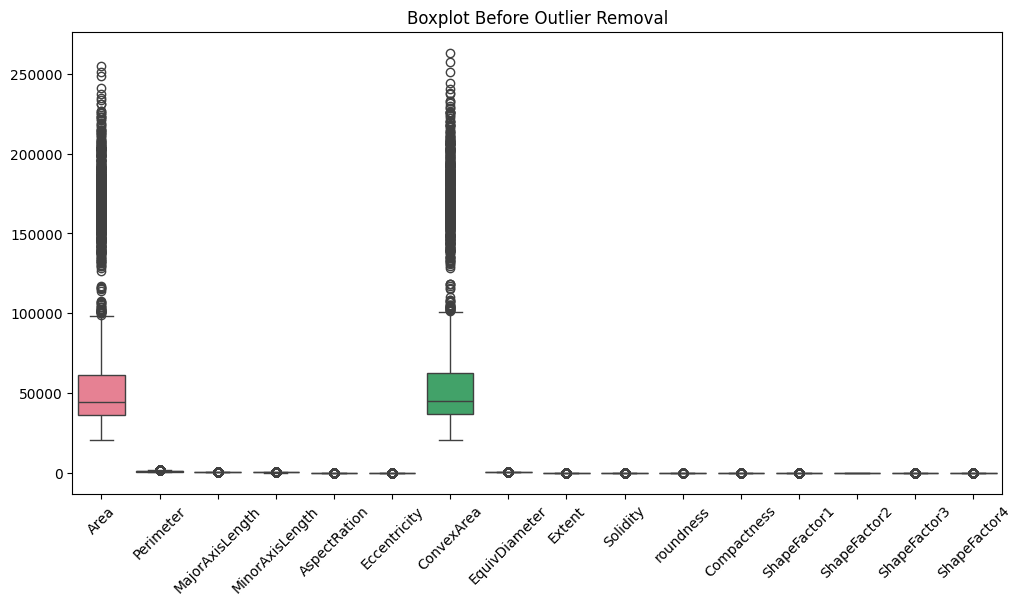

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=["Class"]))
plt.xticks(rotation=45)
plt.title("Boxplot Before Outlier Removal")
plt.show()

In [ ]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

In [ ]:
# Select numerical columns (excluding 'Class')
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Apply outlier removal
df_cleaned = remove_outliers_iqr(df, numerical_cols)


In [ ]:
# Check how many rows were removed
rows_removed = df.shape[0] - df_cleaned.shape[0]
rows_removed

3004

skewness

In [ ]:
# Check skewness of numerical features
skewness = df_cleaned[numerical_cols].apply(skew)
skewed_features = skewness[abs(skewness) > 0.75]  # Consider features with high skewness

In [ ]:
# Log transformation to reduce skewness (adding 1 to avoid log(0))
df_transformed = df_cleaned.copy()
for col in skewed_features.index:
    df_transformed[col] = np.log1p(df_transformed[col])  # log1p(x) = log(1 + x)


In [ ]:
# Check skewness after transformation
skewness_after = df_transformed[numerical_cols].apply(skew)
skewness_after

,0
Area,0.304510
Perimeter,0.630456
MajorAxisLength,0.597614
MinorAxisLength,0.609136
AspectRation,0.680822
Eccentricity,-0.541551
ConvexArea,0.310201
EquivDiameter,0.600587
Extent,-0.541453
Solidity,-0.745396


Most features have acceptable or moderate skewness (between -1 and +1), meaning they are reasonably close to normal distribution.

Highly skewed feature:

ShapeFactor4 has high negative skew (-1.06), indicating a strong asymmetry.


Moderately skewed features (e.g., Perimeter, AspectRation, EquivDiameter):


Nearly symmetric features (e.g., ShapeFactor1, ShapeFactor2):




#EXPLORATORY DATA ANALYSIS (EDA):

##Histogram

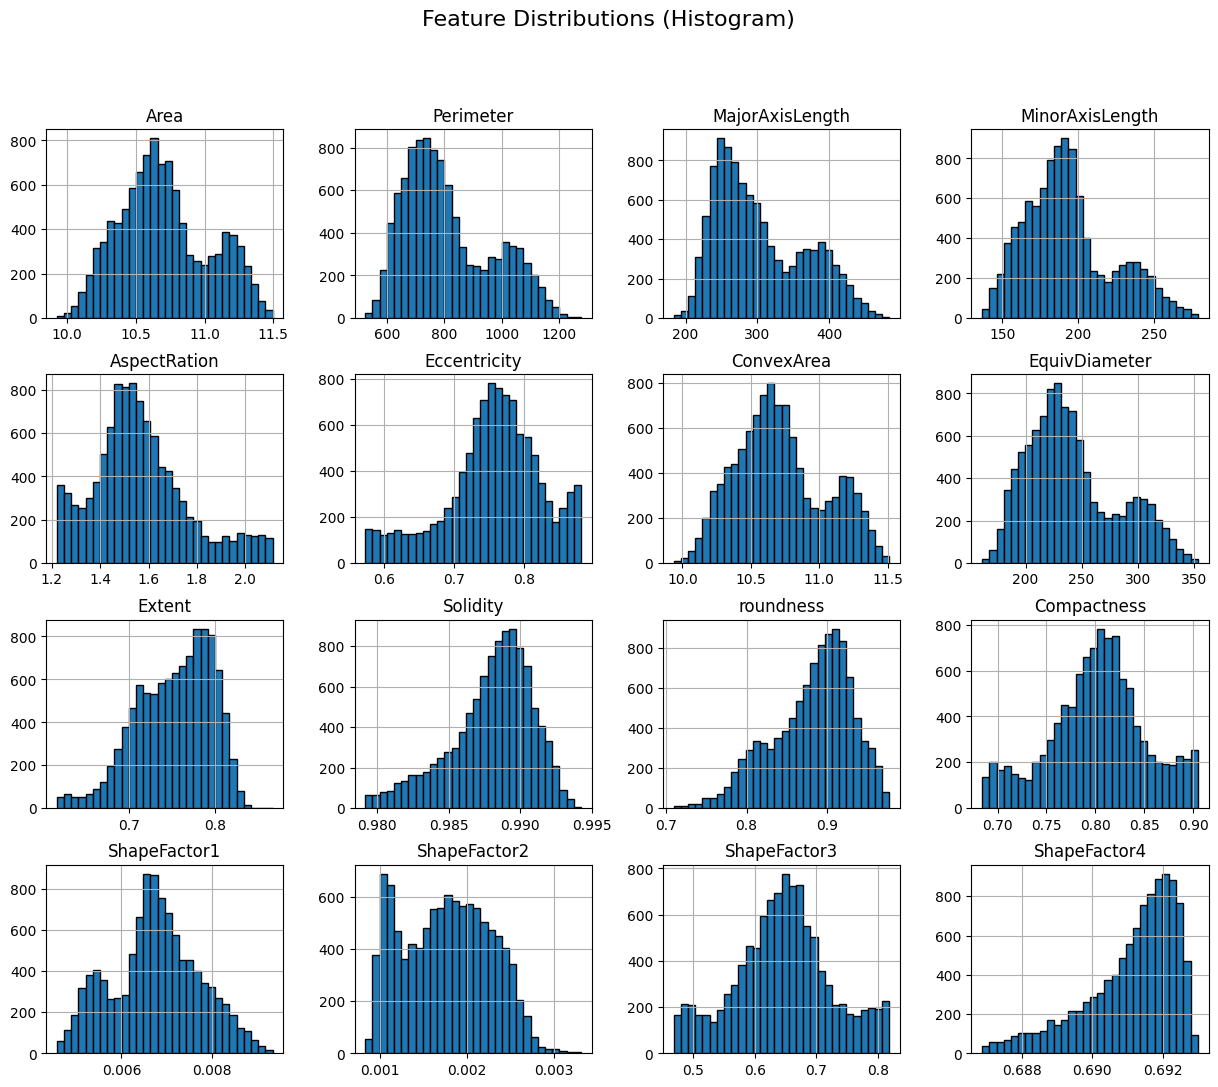

In [ ]:
# Plot histograms for numerical features
df_transformed.hist(figsize=(15, 12), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions (Histogram)", fontsize=16)
plt.show()

##Heat map

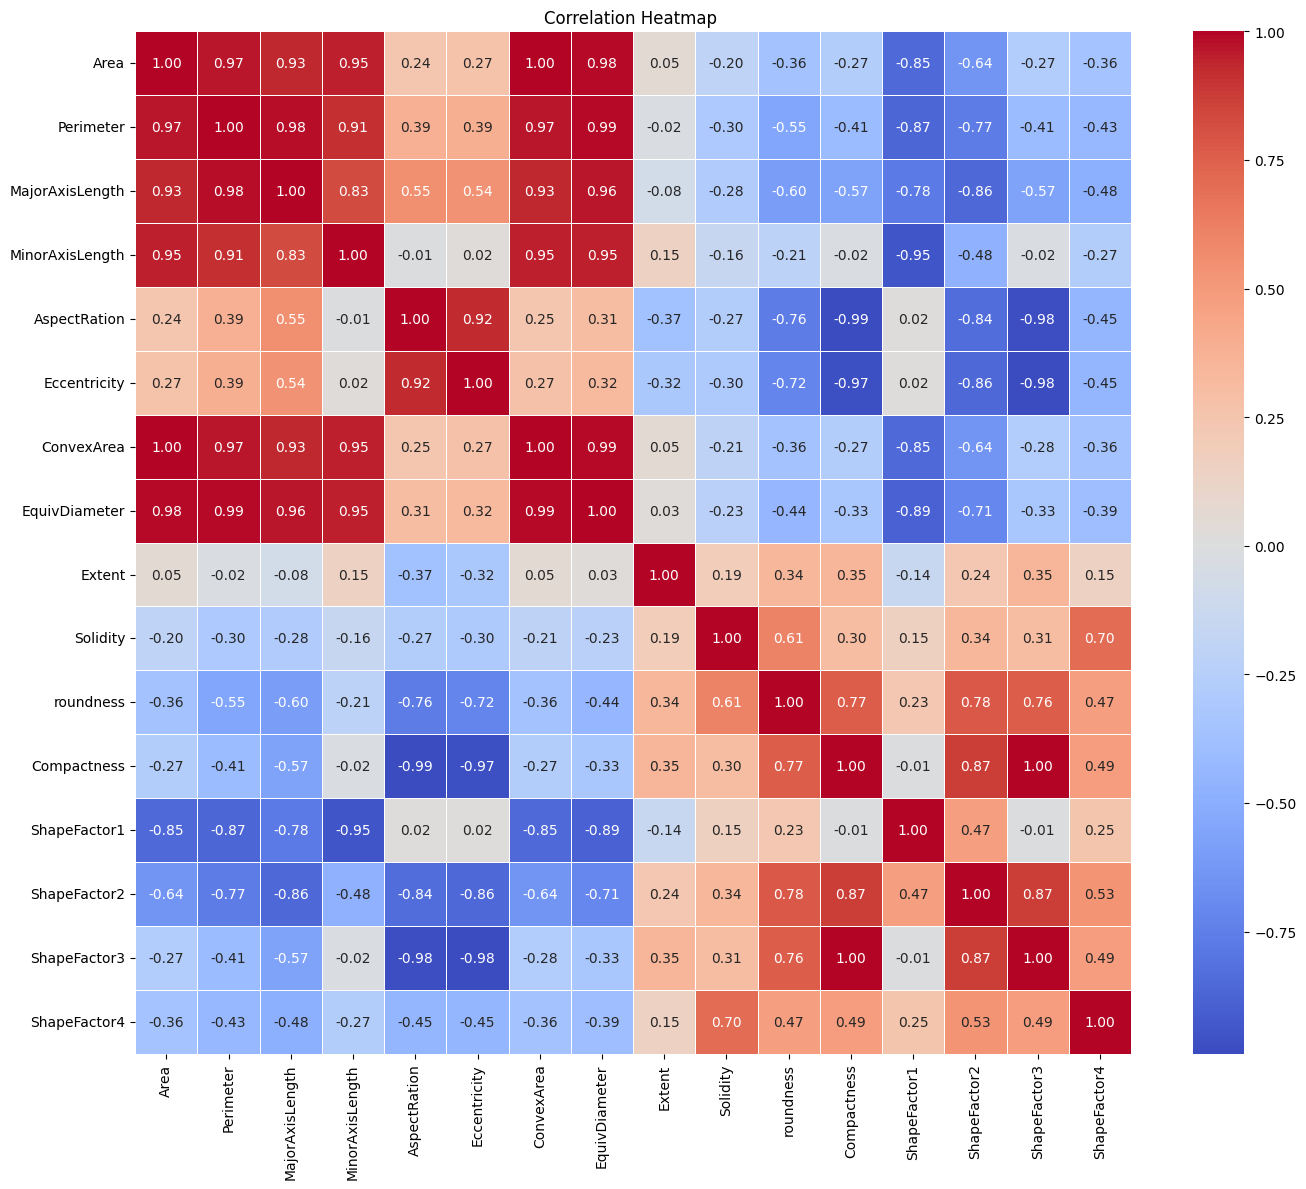

In [ ]:
# Drop the label column for correlation heatmap
df_numeric = df.drop("Class", axis=1)

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap ")
plt.tight_layout()
plt.show()

##Boxplot

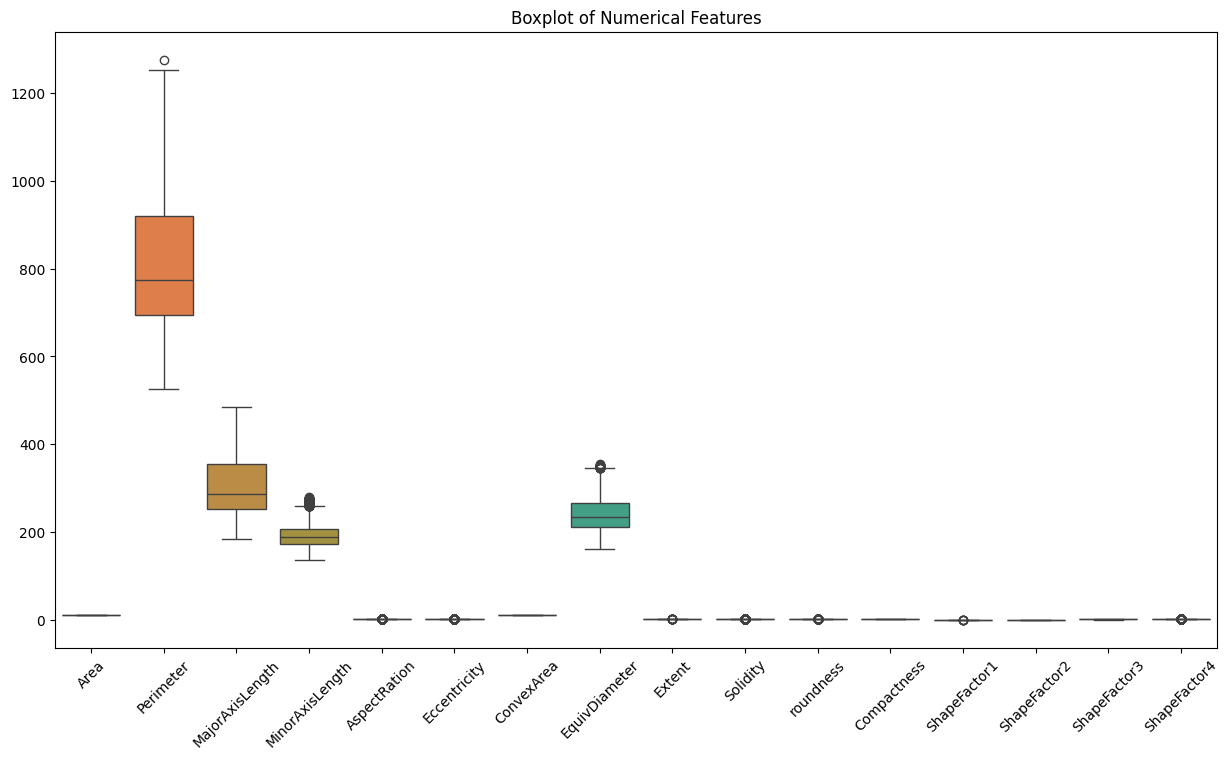

In [ ]:
# Boxplot for all numerical features
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_transformed[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()

##Pie chart

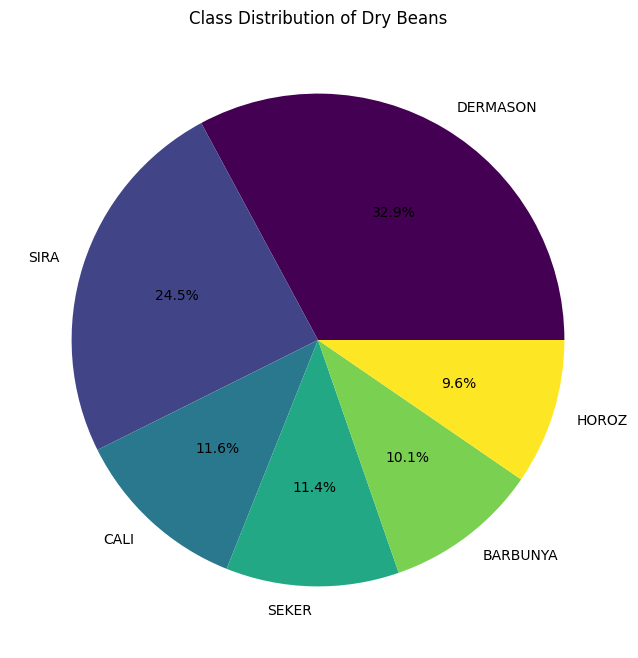

In [ ]:
df_transformed["Class"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(8, 8), cmap="viridis")
plt.title("Class Distribution of Dry Beans")
plt.ylabel("")
plt.show()

##Barplot

<ipython-input-27-059000d20c85>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Class", y="Area", data=df_transformed, palette="viridis")


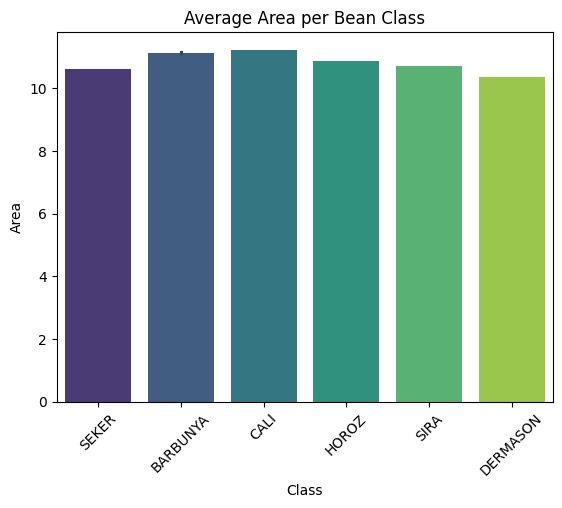

In [ ]:
sns.barplot(x="Class", y="Area", data=df_transformed, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Area per Bean Class")
plt.show()

##Count plot

<ipython-input-28-a6aa5e4c0ac8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=df_transformed, palette="coolwarm")


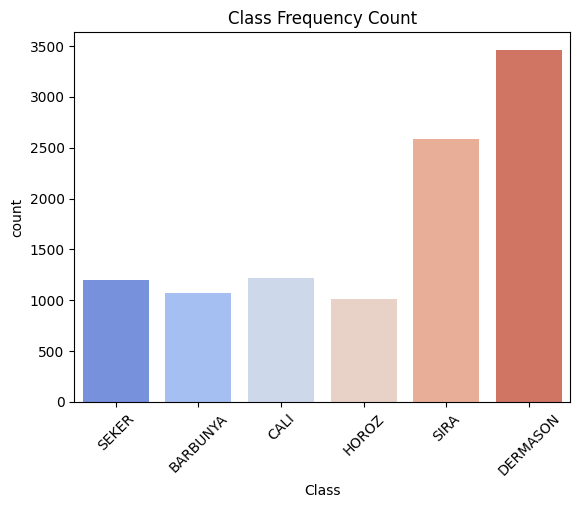

In [ ]:
sns.countplot(x="Class", data=df_transformed, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Class Frequency Count")
plt.show()

##Kernel Density Estimation (KDE)

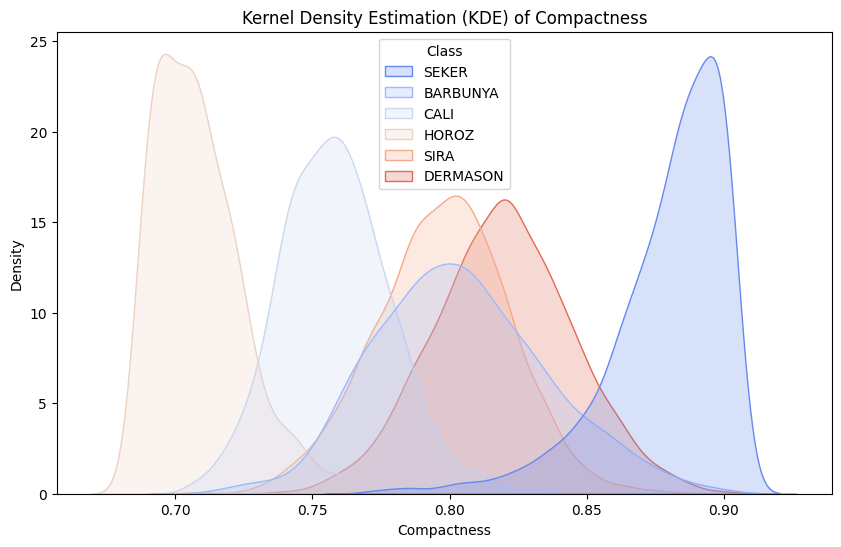

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_transformed, x="Compactness", hue="Class", fill=True, common_norm=False, palette="coolwarm")
plt.title("Kernel Density Estimation (KDE) of Compactness")
plt.show()

#FEATURE ENGENEERING:

In our dataset, only the "Class" column is categorical.

In [ ]:
# Check unique class labels
df_transformed["Class"].unique()

array(['SEKER', 'BARBUNYA', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [ ]:
# One-Hot Encoding for the 'Class' column
df_encoded = pd.get_dummies(df_transformed, columns=["Class"], prefix="Class")

In [ ]:
# Display first few rows
df_encoded.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_BARBUNYA,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
23,10.362114,656.711,229.719255,175.510446,1.308864,0.645191,10.374928,200.702465,0.761823,0.987268,...,0.007261,0.002610,0.763327,0.692693,False,False,False,False,True,False
24,10.363315,657.431,236.752632,171.210559,1.382816,0.690678,10.373804,200.822963,0.740936,0.989565,...,0.007474,0.002387,0.719510,0.690619,False,False,False,False,True,False
29,10.367599,642.092,223.984683,180.917123,1.238051,0.589565,10.375146,201.253629,0.773877,0.992481,...,0.007041,0.002831,0.807329,0.692905,False,False,False,False,True,False
31,10.367976,662.532,222.872689,181.894696,1.225284,0.577858,10.382048,201.291585,0.774848,0.986026,...,0.007004,0.002875,0.815713,0.692887,False,False,False,False,True,False
32,10.368416,656.404,224.912554,180.439422,1.246471,0.596968,10.380932,201.335857,0.785246,0.987561,...,0.007065,0.002798,0.801336,0.692568,False,False,False,False,True,False


#FEATURE SELECTION:

selectkbest:

In [ ]:
# Separate features and target
X = df_encoded.drop(columns=[col for col in df_encoded.columns if "Class_" in col])  # Features
y = df_encoded[[col for col in df_encoded.columns if "Class_" in col]]  # Target (One-Hot Encoded)

In [ ]:
# Scale data (required for chi-square test)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Apply SelectKBest with chi2 test
k_best = SelectKBest(score_func=chi2, k=10)  # Selecting top 10 features
X_new = k_best.fit_transform(X_scaled, y)



In [ ]:
# Get selected feature names
selected_features = X.columns[k_best.get_support()]
print("Top Selected Features:", selected_features)


Top Selected Features: Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'ConvexArea', 'EquivDiameter', 'Compactness',
       'ShapeFactor2', 'ShapeFactor3'],
      dtype='object')


removing redundant feature

In [ ]:
# Drop low-ranked or redundant features
X_selected = X[selected_features]  # Keep only top-ranked features



In [ ]:
# Check final dataset shape
X_selected.shape


(10539, 10)

#FEATURE SCALING

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X_selected)

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns=X_selected.columns)


In [ ]:
X_scaled.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,ConvexArea,EquivDiameter,Compactness,ShapeFactor2,ShapeFactor3
0,-1.044878,-1.008344,-1.183108,-0.616498,-1.312344,-1.040189,-1.004199,1.462665,1.693517,1.504768
1,-1.041199,-1.003640,-1.070340,-0.765358,-0.936508,-1.043626,-1.001215,0.945221,1.246700,0.946456
2,-1.028069,-1.103858,-1.275053,-0.429321,-1.672224,-1.039522,-0.990546,1.967563,2.136775,2.065448
3,-1.026913,-0.970312,-1.292882,-0.395478,-1.737108,-1.018419,-0.989606,2.062187,2.224317,2.172275
4,-1.025565,-1.010350,-1.260176,-0.445859,-1.629432,-1.021832,-0.988510,1.899620,2.071409,1.989084


#SPLIT DATA INTO TRAINING AND TESTING SETS:

In [ ]:
# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Check the shape of train and test sets
print(f"Training Set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing Set: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training Set: X_train = (8431, 16), y_train = (8431, 6)
Testing Set: X_test = (2108, 16), y_test = (2108, 6)


In [ ]:
# Separate features and label
X = df.drop('Class', axis=1)
y = df['Class']  # This is your label

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


this is to reshape dataset

In [ ]:
# pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 3.4 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}



#BUILD ML MODEL and MODEL EVALUATION:



















*   Logistic Regression is a linear classification algorithm used to predict the probability of a binary outcome. It models the relationship between input features and the target using a logistic (sigmoid) function and is widely appreciated for its simplicity and interpretability.




*   Decision Tree is a non-parametric model that splits data into subsets based on feature values, creating a tree-like structure. It’s easy to interpret and captures non-linear patterns, but can be prone to overfitting if not properly pruned.


*   Naive Bayes is a probabilistic classifier based on Bayes’ theorem, assuming independence between features. Despite its simplicity, it performs surprisingly well on high-dimensional data like text, and is extremely fast and scalable.
*   Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs to improve accuracy and reduce overfitting. It’s robust, handles large datasets well, and provides insight into feature importance.

*   K-Nearest Neighbors (KNN) is a simple, instance-based algorithm that classifies a data point based on the majority label among its k closest neighbors. It requires no training but can be computationally expensive at prediction time.


*   Gradient Boosting is a boosting algorithm that builds an ensemble of decision trees in a sequential manner, where each tree attempts to correct the errors of the previous ones. It’s known for its high performance and ability to model complex patterns.












/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre


Model: Logistic Regression
[[ 36   0 177  13   0   5  34]
 [ 11   0  22  17   0  26  28]
 [ 50   0 119  48   0  60  49]
 [  6   0 105 267   0  89 242]
 [ 33   0 149  47   0  22 121]
 [  3   0  37  91   0 230  45]
 [ 12   0 121 155   0  62 177]]
              precision    recall  f1-score   support

           0       0.24      0.14      0.17       265
           1       0.00      0.00      0.00       104
           2       0.16      0.37      0.23       326
           3       0.42      0.38      0.40       709
           4       0.00      0.00      0.00       372
           5       0.47      0.57      0.51       406
           6       0.25      0.34      0.29       527

    accuracy                           0.31      2709
   macro avg       0.22      0.25      0.23      2709
weighted avg       0.27      0.31      0.28      2709

AUC for class 0: 0.78
AUC for class 1: 0.12
AUC for class 2: 0.60
AUC for class 3: 0.46
AUC for class 4: 0.62
AUC for class 5: 0.80
AUC for class 6: 0.64

Mo

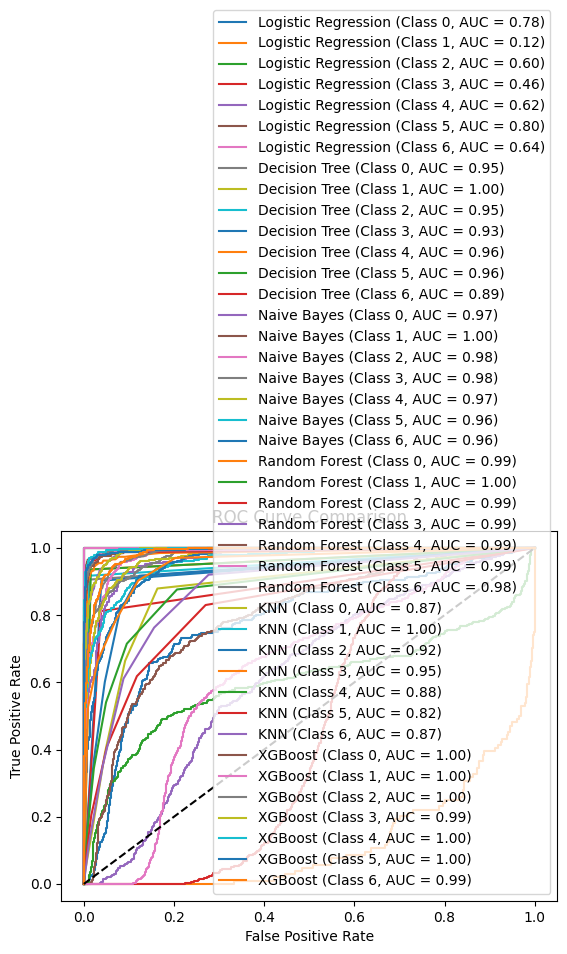

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

# Create a LabelBinarizer object
lb = LabelBinarizer()
# Create a LabelEncoder object
le = LabelEncoder()

for name, model in models.items():
    # Fit the label encoder on the training labels and transform them
    y_train_encoded = le.fit_transform(y_train)

    # Fit the model using the encoded training labels
    model.fit(X_train, y_train_encoded)

    # Transform the test labels for prediction and evaluation
    y_test_encoded = le.transform(y_test)
    y_pred = model.predict(X_test)

    # Fit the label binarizer on the encoded training labels
    lb.fit(y_train_encoded)

    # Transform the encoded test labels into a binary format
    y_test_binarized = lb.transform(y_test_encoded)

    # Get predicted probabilities if available
    y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    print(f"\nModel: {name}")
    print(confusion_matrix(y_test_encoded, y_pred))  # Use encoded labels
    print(classification_report(y_test_encoded, y_pred))  # Use encoded labels

    # Calculate ROC AUC for each class if probabilities are available
    if y_proba is not None:
        # Iterate over each class
        for i in range(y_test_binarized.shape[1]):
            # Calculate AUC for the current class
            auc = roc_auc_score(y_test_binarized[:, i], y_proba[:, i])
            print(f"AUC for class {lb.classes_[i]}: {auc:.2f}")

            # Calculate ROC curve for the current class
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
            plt.plot(fpr, tpr, label=f'{name} (Class {lb.classes_[i]}, AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right') # Adjust legend location if needed
plt.show()

The ROC (Receiver Operating Characteristic) Curve is a graphical tool used to evaluate the performance of a binary classification model. It plots the True Positive Rate (Recall) against the False Positive Rate at various classification thresholds.

* It helps visualize the trade-off between sensitivity and specificity.

* A model with a curve closer to the top-left corner indicates better
  performance.

* The AUC (Area Under the Curve) value summarizes the ROC curve into a single
  score — higher AUC means better model discrimination.

###**Components of ROC Curve**

* True Positive Rate (TPR) (Sensitivity) on the Y-axis

* False Positive Rate (FPR) (1 - Specificity) on the X-axis

A model with a perfect classification has an ROC curve that passes through the top left corner (TPR = 1, FPR = 0).
* AUC (Area Under the Curve)
  AUC measures the area under the ROC curve. Its value ranges between 0 and
  1.AUC = 1: Perfect model

  2.AUC = 0.5: Random guessing (no discrimination power)

  3.AUC < 0.5: Worse than random guessing

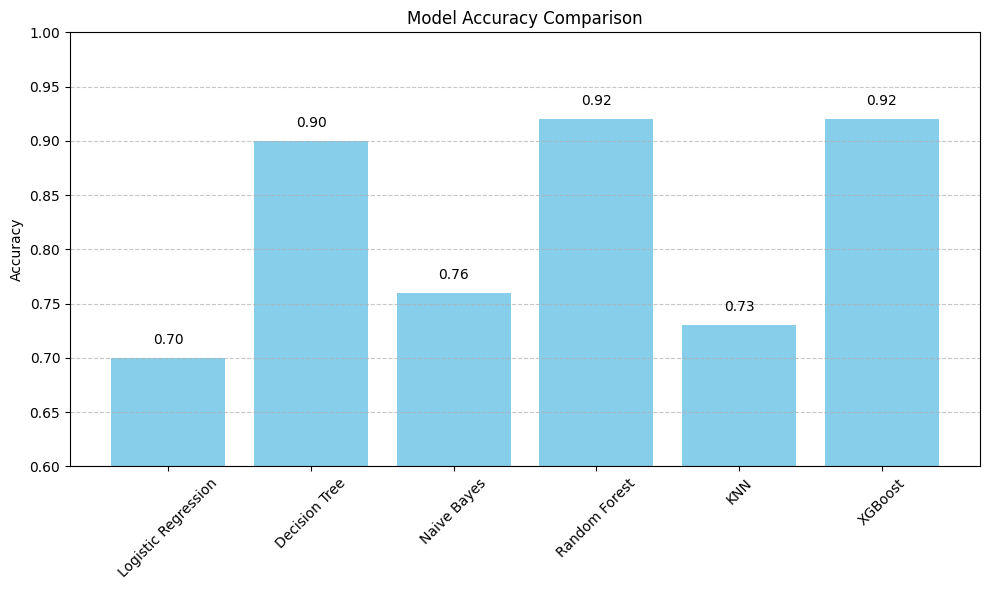

In [ ]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracy scores (as reported earlier)
model_names = [
    "Logistic Regression",
    "Decision Tree",
    "Naive Bayes",
    "Random Forest",
    "KNN",
    "XGBoost"
]

accuracy_scores = [
    0.70,  # Logistic Regression
    0.90,  # Decision Tree
    0.76,  # Naive Bayes
    0.92,  # Random Forest
    0.73,  # KNN
    0.92   # XGBoost
]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores, color='skyblue')
plt.ylim(0.6, 1.0)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bar values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


random forest and XGboost howing 92 % accuracy

#HYPER PARAMETER TUNING AND PIPE LINE:

Hyperparameter tuning is the process of selecting the best set of parameters for a machine learning model that are not learned from the data (like learning rate, number of trees, or depth of trees). It helps improve model performance by finding the optimal configuration using methods like Grid Search, Randomized Search, or Bayesian Optimization, often combined with cross-validation.

A pipeline in machine learning is a tool that sequentially chains data preprocessing and modeling steps into one streamlined workflow. It ensures that each step (like scaling, encoding, and model fitting) is applied consistently and correctly, especially during cross-validation or hyperparameter tuning. This helps make code cleaner, avoids data leakage, and simplifies the model deployment process.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),              # Step 1: Scaling
    ('clf', RandomForestClassifier(random_state=42))  # Step 2: Classifier
])


In [ ]:
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2]
}


In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [None, 10, 20],
                         'clf__min_samples_leaf': [1, 2],
                         'clf__min_samples_split': [2, 5],
                         'clf__n_estimators': [100, 200]},
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Best Parameters: {'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.89      0.90       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.91      0.93      0.92       326
    DERMASON       0.91      0.93      0.92       709
       HOROZ       0.96      0.94      0.95       372
       SEKER       0.94      0.96      0.95       406
        SIRA       0.87      0.86      0.86       527

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709



#SAVE THE MODEL:

In [ ]:
import joblib

# Assuming best_model is your final trained model
joblib.dump(best_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

#TEST WITH UNSEEN DATA:

In [ ]:

X = df.drop('Class', axis=1)

# Generate synthetic unseen data by sampling within min-max range
def generate_unseen_data(original_data, num_samples=100):
    synthetic_data = pd.DataFrame()
    for col in original_data.columns:
        col_min = original_data[col].min()
        col_max = original_data[col].max()
        synthetic_data[col] = np.random.uniform(col_min, col_max, num_samples)
    return synthetic_data

unseen_synthetic = generate_unseen_data(X, num_samples=100)




In [ ]:

# Load trained model if saved
model = joblib.load('random_forest_model.pkl')

#  Predict on synthetic unseen data
predictions = model.predict(unseen_synthetic)

# Show predictions
print("Predicted Classes on Synthetic Unseen Data:")
print(predictions[:20])


Predicted Classes on Synthetic Unseen Data:
['BARBUNYA' 'BARBUNYA' 'BARBUNYA' 'HOROZ' 'SIRA' 'BARBUNYA' 'DERMASON'
 'BOMBAY' 'SIRA' 'BOMBAY' 'BARBUNYA' 'BOMBAY' 'BARBUNYA' 'HOROZ'
 'BARBUNYA' 'BOMBAY' 'HOROZ' 'SEKER' 'BARBUNYA' 'CALI']


DERMASON appears frequently in predictions.This may reflect either a dominant representation in the dataset or overlapping features with other classes.    
Class 'BOMBAY' is the only one not predicted. This might be due to low representation in the training data or less distinguishable morphological features compared to other classes.  
The presence of multiple classes in the output shows that the model learned to differentiate between various bean types and didn’t overfit the training data.

The model predicts a variety of bean types, demonstrating good generalization ability.

#CONCLUSION:

This project focused  to build a predictive model that can classify different varieties of dry beans based on their shape and geometric features. Using supervised machine learning techniques, with random forest emerging as the best-performing model after hyperparameter tuning. It achieved good accuracy not high and balanced performance across metrics such as precision,recall and F1Score.

The Random Forest model has successfully learned patterns in the data and can generalize well to new samples.

It shows a balanced prediction across most classes, which indicates that class imbalances were reasonably handled or did not heavily affect model learning.

DERMASON being the most predicted class suggests:

Either it's more distinguishable.

Or the model has a bias due to higher representation in training data.

#FUTURE WORK:

1. Explore Deep Learning Algorithms

Utilize models such as Artificial Neural Networks (ANNs) or Convolutional Neural Networks (CNNs) (if using image-based features).


Deep learning may capture complex patterns better than traditional machine learning models, especially with larger datasets.

 2. Periodic Model Updates

As more bean data becomes available (e.g., new varieties or environmental changes), retrain or fine-tune the model.

Incorporate continuous learning pipelines to adapt to evolving data.

 3. Real-world Testing & Deployment

Evaluate model performance in practical scenarios like automated sorting systems.

Develop a web or mobile application for real-time bean classification using the trained model.